Berikut adalah dataset yang akan kita gunakan


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Akan dipilih parameter terbaik untuk model
Parameter (C) Terbaik:  {'C': 0.8, 'multi_class': 'multinomial'}
Nilai Rata-Rata (Score) Terbaik:  0.9714285714285714
Akan dipilih Parameter (C) yaitu 0.8

Berikut adalah hasil pengukuran klasifikasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Terlihat akurasi yang dihasilkan dengan parameter yang telah dicapai sebelumnya adalah 0.98 (cukup tinggi).

Berikut adalah grafik Decision Boundaries dari data yang telah diklasifikasikan


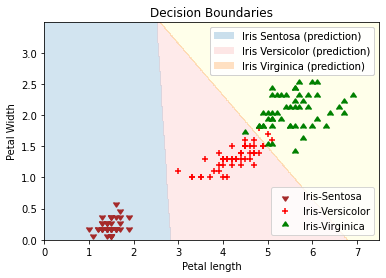

-------------------------------------------------
Berikut adalah jawaban untuk soal pada tugas

Nomor 1
Petal Length = 4 cm dan Petal Width = 2
Adalah spesies Iris-versicolor
Nomor 2
Petal Length = 2.4 cm dan Petal Width = 3
Adalah spesies Iris-setosa
Nomor 3
Petal Length = 5.6 cm dan Petal Width = 3.3
Adalah spesies Iris-virginica


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

#membaca csv
df = pd.read_csv('/content/Iris.csv')

#Untuk memberi tampilan yang menarik
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   GREYBACKBLACK =  '\033[0;30;47m'
   END = '\033[0m'

print(color.BOLD + color.GREYBACKBLACK + "Berikut adalah dataset yang akan kita gunakan"+color.END)
display(df.head())
print("")

#mengubah kategori species menjadi sebuah integer
df.Species = pd.Categorical(df.Species)
df['SpeciesCode'] = df.Species.cat.codes

#megambil kolom Panjang Petal, Lebar Petal, dan Species
cdf = df[['PetalLengthCm', 'PetalWidthCm', 'SpeciesCode']]

#ubah value dari feature/kolom data frame menjadi array 2D untuk selanjutnya kita olah, set sebagai x
X = cdf[['PetalLengthCm', 'PetalWidthCm']]
Y = cdf['SpeciesCode']


#split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Mencari Nilai Terbaik
from sklearn.model_selection import GridSearchCV
grid={'multi_class':['multinomial'],"C":np.arange(0.1,1,0.1)}
LR=LogisticRegression()
LR_cv=GridSearchCV(LR,grid,cv=3,scoring='accuracy').fit(X_train.values, Y_train.values)
print(color.BOLD + color.DARKCYAN + "Akan dipilih parameter terbaik untuk model"+color.END)
print("Parameter (C) Terbaik: ",LR_cv.best_params_)
print("Nilai Rata-Rata (Score) Terbaik: ",LR_cv.best_score_)
print("Akan dipilih Parameter (C) yaitu 0.8")
print("")

MLR = LogisticRegression(C = 0.8, multi_class='multinomial').fit(X_train.values, Y_train.values)
#prediksikan nilai y berdasarkan x pada data uji
yhat = MLR.predict(X_test.values)

from sklearn.metrics import classification_report,accuracy_score
print(color.BOLD+color.BLUE +"Berikut adalah hasil pengukuran klasifikasi"+color.END)
print (classification_report(Y_test, yhat))
print("Terlihat akurasi yang dihasilkan dengan parameter yang telah dicapai sebelumnya adalah 0.98 (cukup tinggi).")
print("")

#Membuat plot berwarna sebagai background dengan contour plot dan meshgrid
h=0.01
xx, yy = np.meshgrid(np.arange(0, 7.5, h), np.arange(0, 3.5, h)) #sumbu x dan y
Z = MLR.predict(np.c_[xx.ravel(), yy.ravel()]) #level dari graf
cmap = 'Paired' #jenis warna cmap yang digunakan adalah Paired
Z = Z.reshape(xx.shape) #mengubah dimensi dari Z
cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2, levels=3) #menampilkan plot
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections] #membuat legend contour plot
scat1=plt.scatter(X[Y==0].iloc[:,0], X[Y==0].iloc[:,1], c='brown', marker=11) #scatter plot untuk kategori 1
scat2=plt.scatter(X[Y==1].iloc[:,0], X[Y==1].iloc[:,1], c='red', marker='+') #scatter plot untuk kategori 2
scat3=plt.scatter(X[Y==2].iloc[:,0], X[Y==2].iloc[:,1], c='green', marker=10) #scatter plot untuk kategori 3

#menampilkan legend sebanyak dua bagian yaitu untuk scatter dan contour secara terpisah
legend1=plt.legend((scat1,scat2,scat3),["Iris-Sentosa","Iris-Versicolor","Iris-Virginica"],loc='lower right')
plt.gca().add_artist(legend1)
legend2=plt.legend(proxy, ["Iris Sentosa (prediction)", "Iris Versicolor (prediction)", "Iris Virginica (prediction)"])
plt.gca().add_artist(legend2)

#pemberian nama sumbu x dan y serta judul graf
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.title('Decision Boundaries')

#menampilkan plot
print(color.BOLD + color.RED + "Berikut adalah grafik Decision Boundaries dari data yang telah diklasifikasikan"+color.END)
plt.show()

print("-------------------------------------------------")
print(color.BOLD + color.GREYBACKBLACK + "Berikut adalah jawaban untuk soal pada tugas"+color.END)
print("")
Pdata = [[4,2],[2.4,3],[5.6,3.3]]
for i in range(len(Pdata)):
  print(color.BOLD + "Nomor {0}".format(i+1)+color.END)
  print("Petal Length = {0} cm dan Petal Width = {1}".format(Pdata[i][0],Pdata[i][1]))
  spec=MLR.predict([Pdata[i]])
  if spec==[0]:
    specpre="Iris-setosa"
  elif spec==[1]:
    specpre="Iris-versicolor"
  else :
    specpre="Iris-virginica"
  print("Adalah spesies "+color.BOLD+color.DARKCYAN+"{0}".format(specpre)+color.END)